# Content-based recommendation for wine :

##### Valentin Tharaud - Luca Pedranzini

## About the dataset
X-Wines: A wine dataset for recommender systems and machine learning<br>
Rogério Xavier de Azambuja (rogerio.xavier@farroupilha.ifrs.edu.br)<br>
Dataset X-Wines from https://github.com/rogerioxavier/X-Wines<br><br>

Link to the data necessary to run the project: https://drive.google.com/drive/folders/1iC90-CMZOpFd3fJlpntbAl8J1VxfcWth?usp=sharing

In [ ]:
# Basic libraries
import pandas as pd

# Display basic configs
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 100) # default= None
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
# Opening X-Wines dataset
wines = pd.read_csv("XWines_Slim_1K_wines.csv", low_memory=False, encoding="utf-8", memory_map=True)
len(wines)

1007

In [ ]:
print("Total wines:", wines.WineID.nunique(), "from", wines.Code.nunique() ,"different countries")

Total wines: 1007 from 31 different countries


In [ ]:
wines.info(), wines.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WineID      1007 non-null   int64  
 1   WineName    1007 non-null   object 
 2   Type        1007 non-null   object 
 3   Elaborate   1007 non-null   object 
 4   Grapes      1007 non-null   object 
 5   Harmonize   1007 non-null   object 
 6   ABV         1007 non-null   float64
 7   Body        1007 non-null   object 
 8   Acidity     1007 non-null   object 
 9   Code        1007 non-null   object 
 10  Country     1007 non-null   object 
 11  RegionID    1007 non-null   int64  
 12  RegionName  1007 non-null   object 
 13  WineryID    1007 non-null   int64  
 14  WineryName  1007 non-null   object 
 15  Website     900 non-null    object 
 16  Vintages    1007 non-null   object 
dtypes: float64(1), int64(3), object(13)
memory usage: 133.9+ KB


(None,
 WineID          0
 WineName        0
 Type            0
 Elaborate       0
 Grapes          0
 Harmonize       0
 ABV             0
 Body            0
 Acidity         0
 Code            0
 Country         0
 RegionID        0
 RegionName      0
 WineryID        0
 WineryName      0
 Website       107
 Vintages        0
 dtype: int64)

In [ ]:
wines.Type.value_counts()

Type
Red             506
White           232
Sparkling       100
Rosé             85
Dessert          59
Dessert/Port     25
Name: count, dtype: int64

In [ ]:
wines.Body.value_counts()

Body
Full-bodied          392
Medium-bodied        348
Very full-bodied     134
Light-bodied         118
Very light-bodied     15
Name: count, dtype: int64

In [ ]:
wines.Acidity.value_counts()

Acidity
High      740
Medium    249
Low        18
Name: count, dtype: int64

In [ ]:
wines.Country.value_counts().sort_index()

Country
Argentina          50
Australia          48
Austria            18
Brazil             48
Canada             19
Chile              69
Croatia             1
Czech Republic      2
France            179
Germany            54
Greece             13
Hungary             8
Israel              1
Italy             139
Lebanon             4
Malta               5
Mexico              8
Moldova             1
New Zealand        33
Portugal           83
Romania             2
Russia              7
Slovenia            1
South Africa       32
Spain              48
Switzerland         4
Turkey              1
Ukraine             6
United Kingdom      1
United States     114
Uruguay             8
Name: count, dtype: int64

## Project Goals

The primary goal of this project is to develop a system that can identify wines similar to a given wine from the dataset.

### Approaches

1. **K-Nearest Neighbors (KNN) on Principal Component Analysis (PCA)**:
   - Reduce the dimensionality of the dataset using PCA.
   - Use KNN to find wines similar to the target wine based on the reduced dimensions.

2. **Cosine Similarity on Singular Value Decomposition (SVD)**:
   - Apply SVD to decompose the dataset.
   - Compute cosine similarity between wines based on the resulting components.

3. **Cosine Similarity with Neural Network Embeddings**:
   - Train a neural network to learn embeddings for the wines.
   - Use cosine similarity to find similar wines based on these learned embeddings.

### Expected Outcome

Since both the KNN on PCA and the cosine similarity on SVD approaches involve computing cosine distances, we anticipate that they will yield similar results. The experiment with neural network embeddings aims to compare and possibly enhance the effectiveness of similarity detection using learned representations.

## Preprocess the Wine dataset :

### Problem of the dataset :

This Wine data are unusable in this state, why is that ? Because they are almost all textual variable, and a computer can't process them and compare them in this state or not like we want him to compare them.

### Readind and processing the data :


#### Importing the required library :

In [1]:
import pandas as pd
import numpy as np

#Newt library are only for presentation purposes
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML



#### Reading the data :

We **drop** some column that we did consider **not usefull** to compare the wines.

In [4]:

#read the data
wineDataset = pd.read_csv("datasets\XWines_Slim_1K_wines.csv").drop(columns=["WineryID","WineryName","Website","Vintages","RegionID","Code"])
wineOutName = wineDataset.drop(columns="WineName")
display(wineDataset)
sparsityBefore = 1.0 - ( np.count_nonzero(wineDataset) / float(wineDataset.size) )
print(f"Sparsity of the matrix : {sparsityBefore*100}%")


,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Country,RegionName
0,100001,Espumante Moscatel,Sparkling,Varietal/100%,['Muscat/Moscato'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,Brazil,Serra Gaúcha
1,100002,Ancellotta,Red,Varietal/100%,['Ancellotta'],"['Beef', 'Barbecue', 'Codfish', 'Pasta', 'Pizz...",12.0,Medium-bodied,Medium,Brazil,Serra Gaúcha
2,100003,Cabernet Sauvignon,Red,Varietal/100%,['Cabernet Sauvignon'],"['Beef', 'Lamb', 'Poultry']",12.0,Full-bodied,High,Brazil,Serra Gaúcha
3,100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,"['Cabernet Sauvignon', 'Merlot']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",11.0,Full-bodied,Medium,Brazil,Serra Gaúcha
4,100007,Do Lugar Moscatel Espumantes,Sparkling,Varietal/100%,['Muscat/Moscato Bianco'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,Brazil,Serra Gaúcha
...,...,...,...,...,...,...,...,...,...,...,...
1002,199408,Petite Arvine,White,Varietal/100%,['Petite Arvine'],"['Pasta', 'Shellfish', 'Maturated Cheese', 'Ha...",13.5,Medium-bodied,High,Switzerland,Valais
1003,199481,St. Laurent Reserve,Red,Varietal/100%,['St. Laurent'],"['Beef', 'Lamb', 'Game Meat']",14.0,Medium-bodied,High,Austria,Mittelburgenland
1004,199533,Mariengarten Chardonnay,White,Varietal/100%,['Chardonnay'],"['Pork', 'Rich Fish', 'Vegetarian', 'Poultry']",12.2,Full-bodied,High,Austria,Südsteiermark
1005,199885,Grüner Veltliner Federspiel Ried Kreuzberg,White,Varietal/100%,['Grüner Veltliner'],"['Pork', 'Vegetarian', 'Poultry', 'Lean Fish',...",12.2,Medium-bodied,High,Austria,Wachau


Sparsity of the matrix : 0.0%


*As we said in the begining, a lot of variable Have textual values*

&nbsp;   

We simplify some of the variable that have some small difference between two possible values to simplify the data and reduce the number of dimensions later on.   
**Ex** : `"Dessert/White"` => `"White"`   
   
To do that we create a function: `get_first_split()` to only read the first part of a variable, so we can apply it to the whole column, it's more **computing efficient** and **readable**.

In [ ]:

#get the function to only read a cell until a / to apply to column
def get_first_split(input_string, split_by='/'):
    try:
        input_string_stripped = input_string.strip()
        split_by_index = input_string_stripped.find(split_by)
        if split_by_index == -1:
            return input_string_stripped
        else:
            substring = input_string_stripped[:split_by_index].strip()
            return substring
    except AttributeError:
        return ''



show= wineOutName[["Elaborate","Type"]].head(10).to_html()

#drop to complex attribute to simplify the data 
wineOutName["Elaborate"] = wineOutName["Elaborate"].apply(get_first_split)
wineOutName["Type"] = wineOutName["Type"].apply(get_first_split)

#Presentation purposes only
HTML( "<div style=\"width: 100%\";>\n<div style=\"width: 500px; float: left;\">\n"+show+"\n</div>" +"<div>\n"+wineOutName[["Elaborate","Type"]].head(10).to_html()+"\n</div>" )



,Elaborate,Type
0,Varietal/100%,Sparkling
1,Varietal/100%,Red
2,Varietal/100%,Red
3,Assemblage/Bordeaux Red Blend,Red
4,Varietal/100%,Sparkling
5,Varietal/100%,Red
6,Assemblage/Blend,Red
7,Assemblage/Portuguese White Blend,White
8,Assemblage/Port Blend,Dessert/Port
9,Assemblage/Port Blend,Dessert/Port


### Ordinal Textual Variable :

In the dataset we have different columns which have **ordinal values**.  
This means they have values that **can be classified** in different groups, and that these groups are **rankable**. Since for nom they are **textual** we will change it to **number** so that the comupter can see this ranking.   
   
Ex: `High, Medium, Low` => `1, 0, -1`

In [ ]:
show = wineOutName[["Body","Acidity"]].head(10).to_html()
# replace another categorical values column by ordinal value for Body
wineOutName["Body"] = wineOutName["Body"].replace("Very full-bodied",2)
wineOutName["Body"] = wineOutName["Body"].replace("Full-bodied",1)
wineOutName["Body"] = wineOutName["Body"].replace("Medium-bodied",0)
wineOutName["Body"] = wineOutName["Body"].replace("Light-bodied",-1)
wineOutName["Body"] = wineOutName["Body"].replace("Very light-bodied",-2)

# Same with Acidity
wineOutName["Acidity"] = wineOutName["Acidity"].replace("High",1)
wineOutName["Acidity"] = wineOutName["Acidity"].replace("Medium",0)
wineOutName["Acidity"] = wineOutName["Acidity"].replace("Low",-1)

#Presentation purposes only
HTML( "<div style=\"width: 100%\";>\n<div style=\"width: 300px; float: left;\">\n"+show+"\n</div>" +"<div>\n"+wineOutName[["Body","Acidity"]].head(10).to_html()+"\n</div>" )


,Body,Acidity
0,Medium-bodied,High
1,Medium-bodied,Medium
2,Full-bodied,High
3,Full-bodied,Medium
4,Medium-bodied,High
5,Full-bodied,High
6,Full-bodied,High
7,Very light-bodied,High
8,Very full-bodied,High
9,Very full-bodied,High


### Categorical Textual Variable :

In the dataset we have different columns which have **categorical values**.  
This means they have values that **can be classified** in different groups, and that these groups are **not rankable**. On top of that these variables are **textual** so we need to modify this too.   
   
We can't assign number to each variable because it will **bring a ranking** that does not exist in the data, so we do a **one-hot encoding**.  


A **One Hot Encoding** consist of rearenging the data values into columns and assigning a **1 or a 0** to this new columns based on the presence or not of the values in the original data.   
For exemple, in One Hot Encoding, the categorical parameters will prepare separate columns for both Male and Female labels. So, wherever there is a Male, the value will be 1 in the Male column and 0 in the Female column
   
**Ex**:
| Name    | Sex |
| -------- | ------- |
| Valentin  | Male   |   
| Marylou | Female     |  

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&#x2193;   

| Name    | Male | Female |
| -------- | ------- | ------- |
| Valentin  | 1   | 0 |
| Marylou | 0 | 1 |

In [ ]:
show = wineOutName[["Type"]].head(10).to_html()
#get rid of some categorical columns variable by one hot encoding (here Type)
typeWine= pd.get_dummies(wineOutName["Type"], dtype=float)
wineOutName = wineOutName.merge(typeWine,left_on=wineOutName.index,right_on=typeWine.index).drop(columns=["key_0","Type"])

#get rid of some categorical columns variable by one hot encoding (here Elaborate)
elaborateWine= pd.get_dummies(wineOutName["Elaborate"], dtype=float)
wineOutName = wineOutName.merge(elaborateWine,left_on=wineOutName.index,right_on=elaborateWine.index).drop(columns=["key_0","Elaborate"])

# replace another categorical values column by one hot encoding Grapes
wineOutName['Grapes'] = wineOutName['Grapes'].apply(eval)
listListGrape = wineOutName['Grapes'].to_list()
listGrape = [grape for listGrape  in listListGrape for grape in listGrape]
setGrape= set(listGrape)
listGrape = list(setGrape)

# replace another categorical values column by one hot encoding Harmonize
wineOutName['Harmonize'] = wineOutName['Harmonize'].apply(eval)
listListHarmonize = wineOutName['Harmonize'].to_list()
listHarmonize = [harmonize for listHarmonize  in listListHarmonize for harmonize in listHarmonize]
setHarmonize= set(listHarmonize)
listHarmonize = list(setHarmonize)

# replace another categorical values column by one hot encoding RegionName
listRegionName = wineOutName['RegionName'].to_list()
setRegionName= set(listRegionName)
listRegionName = list(setRegionName)

# replace another categorical values column by one hot encoding Country
listCountry = wineOutName['Country'].to_list()
setCountry= set(listCountry)
listCountry = list(setCountry)

#Presentation purposes only
HTML( "<div style=\"width: 100%\";>\n<div style=\"width: 300px; float: left;\">\n"+show+"\n</div>" +"<div>\n"+typeWine.head(10).to_html()+"\n</div>" )

,Type
0,Sparkling
1,Red
2,Red
3,Red
4,Sparkling
5,Red
6,Red
7,White
8,Dessert
9,Dessert


*We can see that One Hot Encoding multiply the dimension by a lot so we will need to do something about that*

&ensp;

### Finishing the preprocessing :

This last part is used to add the One hot encoded Variable to a new dataframe and to rename the column with more explicit one, it's a long part that takes more than 5 minutes to compute.  
Once the new dataframe is done we export it to a csv file so we dont have to do the preprocessing anymore.

In [ ]:
listColumns = listCountry+listRegionName+listHarmonize+listGrape

wineOutName['Grapes'][0][0]
listListGrape = wineOutName['Grapes'].to_list()
listListGrape

def get_Row2List(i):
    listListHarmonizeGrape = wineOutName[['Grapes', 'Harmonize']].iloc[i].to_list()
    listHarmonizeGrape = [x for listHarmonizeGrape  in listListHarmonizeGrape for x in listHarmonizeGrape]
    listRegionNameCountry = wineOutName[['Country','RegionName']].iloc[i].to_list()
    return listHarmonizeGrape+listRegionNameCountry

emptyDf = pd.DataFrame(np.ones((len(wineOutName),len(listColumns))),columns=listColumns)
for i in range(len(emptyDf)):
    list2Zeroes = [x for x in emptyDf.columns if x not in get_Row2List(i)]
    emptyDf.loc[i,list(set(list2Zeroes))]=0
listColumns = ["Country_"+x for x in listCountry]+["RegionName_"+x for x in listRegionName]+["Harmonize_"+x for x in listHarmonize]+["Grape_"+x for x in listGrape]
emptyDf.columns=listColumns
wineOutName = pd.concat([wineOutName,emptyDf],axis=1).drop(columns=['Grapes', 'Harmonize', 'Country','RegionName'])
wineOutName.to_csv("datasets/XWines_Vecto_1K.csv",index=False)


*Since the above code is long to execute here is the final data printed from the previously exported dataframe*

In [5]:
wineDataset = pd.read_csv("datasets\XWines_Vecto_1K.csv")
display(wineDataset)
sparsity = 1.0 - ( np.count_nonzero(wineDataset) / float(wineDataset.size) )
print(f"Sparsity of the matrix before preprocessing: {sparsityBefore*100}% \nSparsity of the matrix after: {round(sparsity*100,1)}%")

,WineID,ABV,Body,Acidity,Dessert,Red,Rosé,Sparkling,White,Assemblage,...,Grape_Molinara,Grape_Muscat/Moscato Bianco,Grape_Bacchus,Grape_Zweigelt,Grape_Blaufränkisch,Grape_Lemberger,Grape_Ugni Blanc,Grape_Carignan/Cariñena,Grape_Susumaniello,Grape_Saperavi
0,100001,7.5,0,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100002,12.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100003,12.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100005,11.0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,7.5,0,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,199408,13.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,199481,14.0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,199533,12.2,1,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,199885,12.2,0,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Sparsity of the matrix before preprocessing: 0.0% 
Sparsity of the matrix after: 97.8%


*We can see that the columns went from 10 to 600 and that the sparsity of the data went up a lot. We can also see that now the data are alle number so it will be easier to compute, for example the distances between two wines, to see wich are the most similar.*

## PCA and KNN for content based recommendation algorithm :




### Import the library :  
- `pandas` for csv reading and treatment
- `numpy` for matrix computation
- `sklearn` for different algorithm such as PCA or KNN wich will be done without us having to code anything
- `matplotlib` for plotting some of our results  
- `sklearn` for different algorithm such as TruncatedSVD or cosine_similarity wich will be done without us having to code anything   


In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**We create a function wich will be usefull later on :**  
The goal of `Cumulative_sum()` is to take a list as an input and add each component with the summ of the previous one.   
**Ex :** `[1,2,3,4]` => `[1,3,6,10]`

In [7]:
# Cumulative sum  
def Cumulative_sum(lists):   
    cum_list = []   
    length = len(lists)   
    cum_list = [sum(lists[0:x:1]) for x in range(0, length+1)]   
    return cum_list[1:]  

### Reading The Data and Preprocess it :
We read the data of the csv and create a new dataset that will be used during the code.   
To do that we remove the mean and divide by the variance from the ABV so that it doesnt have more importance than the other variable.

In [8]:
#read the data
wineDataset = pd.read_csv("datasets\XWines_Vecto_1K.csv")
#setup the data correclty for the training
dataTrain = wineDataset.drop(columns="WineID")
#remove variance and meaning to 0
dataTrain["ABV"] = (wineDataset["ABV"]- wineDataset["ABV"].mean())/np.std(wineDataset["ABV"], ddof=0)


### Computing the PCA to reduce number of component :

**Then we use the `PCA()` function fro sklearn.**   
To find the number of component we want to have after the PCA we plot the variance explained with 100 component to see our optimum number of variable

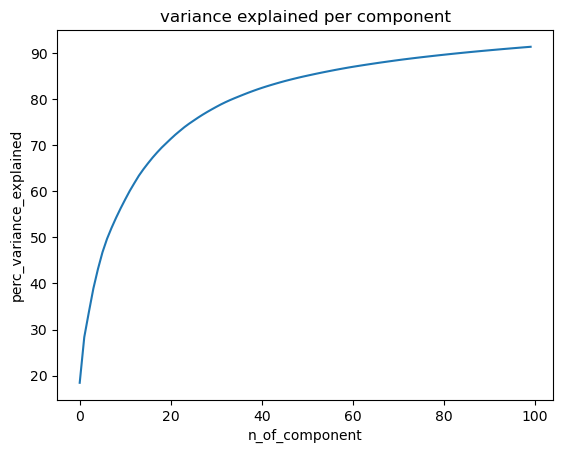

In [9]:
#pca, plotting the variance explained to make a choice
pca = PCA(n_components=100)
pca.fit(dataTrain)
perc_variance_explained = Cumulative_sum(pca.explained_variance_ratio_*100)
n_of_component= [ x for x in range(100)]
plt.plot(n_of_component,perc_variance_explained)
plt.xlabel('n_of_component')
plt.ylabel('perc_variance_explained')
plt.title("variance explained per component")
plt.show()


We choose **60 PC** out of **600 features** : **90% less features** for a **10% information loss**<br>
We then merge our `WineID` with their corresponding PCA so we can use it more intuitively for the recommendation

In [10]:
#choose 60 PC out of 600 features : 90% less features for a 10% information loss
nb_comp = 60
pca = PCA(n_components=nb_comp)#initialisation of the model
pca_array = pca.fit_transform(dataTrain)#fitting of the model on our data

colPCA=["PC"+str(x) for x in range(nb_comp)]#creating col name for readability
wineDatasetPCA = pd.DataFrame(pca.fit_transform(dataTrain),columns=colPCA)

WineId=pd.DataFrame(wineDataset["WineID"])
wineDatasetPCA = WineId.merge(wineDatasetPCA,left_on=WineId.index,right_on=wineDatasetPCA.index).drop(columns="key_0")



### Finding the K-Nearest Neighbors of the points :

First we fit the **KNN** model of sklearn to our data, with 6 nearest neighbors, we want only **5 recommendations** but the Wine itself will be one of the nearest neighbors, thats why we will remove it after that.  
So we use the `NearestNeighbors()` function and initialise it so that it uses cosine distances and the number of recommendation we want

In [11]:
testWineIndex=0

neigh = NearestNeighbors(n_neighbors=6,metric="cosine")
neigh.fit(pca_array)
dist, index = neigh.kneighbors([wineDatasetPCA.iloc[testWineIndex].drop("WineID")], return_distance=True)
index = index[0].tolist()
dist = dist[0].tolist()
if testWineIndex in index :
    torm = index.index(testWineIndex)
    del index[torm]
    del dist[torm]
else:
    del index[-1]
    del dist[-1]


## SVD and Cosine similarity for content based recommendation algorithm :  

### Preprocessing and reading the data :

In [12]:
RatePerWine = pd.read_csv("datasets\XWines_Vecto_1K.csv").drop(columns="WineID")
WineData = pd.read_csv("datasets\XWines_Slim_1K_wines.csv")
WineIndex = pd.Series(WineData.index,index=WineData["WineName"])

### Computing the SVD to reduce the number of component :   
In input we pass the **number of component** we want to have after the truncation, we say the **number of iteration** we want to have before to have the final weight of those components, and the **random state** because we want this to be reproducable.  
   
     
We do the same as the pca we **plot for 100 components** the **variance explained** and then we choose our number of component.   
We will here choose **40 components** to have the same number of variance explained as the **PCA** so that the results can be compared.  
   
      
Since there is less component the result should be a bit more precise.   

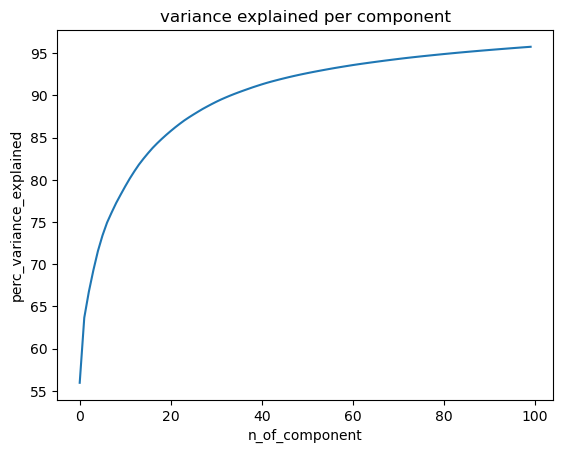

In [13]:

svd = TruncatedSVD(n_components=100, n_iter=5, random_state=42)#we do a svd with a lot of component to see how they influences the variance
svd.fit(RatePerWine)

perc_variance_explained = Cumulative_sum(svd.explained_variance_ratio_*100)
n_of_component= [ x for x in range(100)]
plt.plot(n_of_component,perc_variance_explained)
plt.xlabel('n_of_component')
plt.ylabel('perc_variance_explained')
plt.title("variance explained per component")
plt.show()#we can see that we have 91% of variance explaine for 40 component and then it starts to slow down in reduction
#we do a svd the number of component we decided
svd = TruncatedSVD(n_components=40, n_iter=5, random_state=42)



We aply the truncation to our matrix and then use it to compute the **cosine similarity** between all the vector. 
   
Then we do a function that will give us the **recommendation** by finding the **closest distance to the wine** we input

In [14]:
RatePerWine = svd.fit_transform(RatePerWine)
cosine_sim = cosine_similarity(RatePerWine, RatePerWine)

def get_recommendations(WineName, cosine_sim=cosine_sim,indices=WineIndex, num_recommend = 10):
    try :
        idx = indices[WineName].iloc[0]
    except :
        idx = indices[WineName]
# Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
# Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
# Get the scores of the 10 most similar movies
    top_similar = sim_scores[1:num_recommend+1]
# Get the movie indices
    movie_indices = [i[0] for i in top_similar]
    
# Return the top 10 most similar movies
    return WineData['WineName'].iloc[movie_indices].index


### Comparing the results of the two algorithms :

We can compare the **different prediction** of the two algorithm to see if they have **similar results**, we will plot it for **1 to 10 predictions** to see how they go over number of predictions

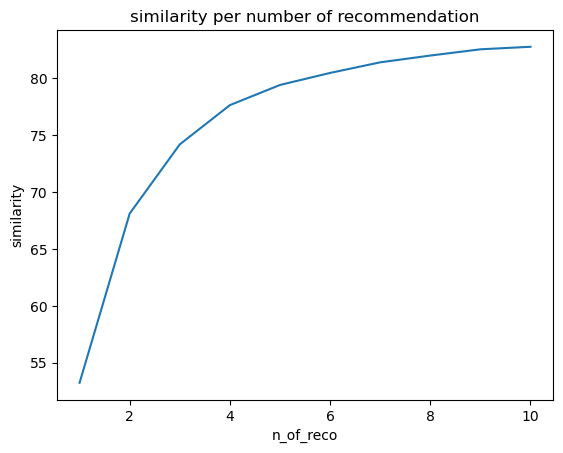

In [15]:
allsimi=[]
for n_reco in range(1,11):
    neigh = NearestNeighbors(n_neighbors=n_reco+1,metric="cosine")
    neigh.fit(pca_array)
    error=0
    for idxWine in range(len(WineData['WineName'])):
        indexSVD = get_recommendations(WineData['WineName'].iloc[idxWine], num_recommend = n_reco)
        index = neigh.kneighbors([wineDatasetPCA.iloc[idxWine].drop("WineID")], return_distance=False)
        index = index[0].tolist()
        if testWineIndex in index :
            torm = index.index(testWineIndex)
            del index[torm]
        else:
            del index[-1]
        error+=len(set(indexSVD.to_list()+index))-n_reco
    simiPerc=100-(error/(len(WineData['WineName'])*(n_reco*2)))*100
    allsimi.append(simiPerc)

n_of_reco=[x for x in range(1,11)]
plt.plot(n_of_reco,allsimi)
plt.xlabel('n_of_reco')
plt.ylabel('similarity')
plt.title("similarity per number of recommendation")
plt.show()

As we can see the **more recommendation** we have the **more similar** the 2 algorithm give results.   

It was to be expected since the error are **covered** by the **high number of recommendation**.   
Since it's **not usefull** if we have **too much recomendation** and we dont know **wich algorithm is the best**, we think that a good compromise is two choose the **lowest number** to give **decent similarity**(~80%), wich is 5 for us.  
  
So with **5 recommendations** we have **~80% similarity** wich means the results are **based on a real patern**.  

## Machine Learninig Embeddings approach

The aim remains the same as before but we compute cosine similarity differently.We create a custom dataset class to generate **triplets (anchor, positive, and negative samples)** for training a neural network model. The model learns to project the combined features into an embedding space using fully connected layers. The training process involves **optimizing a triplet margin loss** to distinguish between similar and dissimilar wines. The embeddings are then extracted and used to compute cosine similarity between wines

### Import the library:
- `pandas` for CSV reading and data manipulation.
- `numpy` for numerical computations and matrix operations.
- `torch` for building and training neural networks.
- `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` for handling datasets and batching.
- `torch.nn` for defining neural network layers.
- `torch.nn.functional` for common functions used in neural networks.
- `torch.optim.Adam` for the Adam optimization algorithm.

In [21]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam

## Load the dataset

In [22]:
# Load the dataset
wines = pd.read_csv("datasets/XWines_Vecto_1K.csv")

# Extract features excluding 'WineID'
wine_features = wines.columns.drop("WineID").to_numpy()

# Map wine_id to indices
wine_ids = wines['WineID'].unique()
wine_to_index = {id: index for index, id in enumerate(wine_ids)}
index_to_wine = {index: id for index, id in enumerate(wine_ids)}

## Create a simple dataset and dataloader
A custom dataset class is defined for **triplet training**, which involves selecting an **anchor wine**, a **positive (similar) wine**, and a **negative (dissimilar) wine**. **Random selection** ensures a **diverse set of training samples**. The **DataLoader** facilitates **efficient batch processing** and **shuffling**, which is essential for **effective training** of the model.


In [23]:
class WineTripletDataset(Dataset):
    def __init__(self, df):
        self.wine_ids = df['WineID'].values
        self.features = df[df.columns.drop('WineID')].astype('float64').values
        self.num_wines = len(self.wine_ids)
    
    def __len__(self):
        return self.num_wines
    
    def __getitem__(self, idx):
        anchor_features = self.features[idx]
        positive_idx = np.random.randint(0, self.num_wines)
        negative_idx = np.random.randint(0, self.num_wines)
        positive_features = self.features[positive_idx]
        negative_features = self.features[negative_idx]
        return (
            torch.tensor(anchor_features, dtype=torch.float32),
            torch.tensor(positive_features, dtype=torch.float32),
            torch.tensor(negative_features, dtype=torch.float32)
        )

# Initialize dataset and dataloader
triplet_dataset = WineTripletDataset(wines)
triplet_dataloader = DataLoader(triplet_dataset, batch_size=64, shuffle=True)

## Define the model
We define a **simple neural network model** with an **embedding layer** that learns a **vector representation (embedding)** for each wine. The **embedding dimension** is set to **50**, which balances between capturing enough detail and computational efficiency.


In [24]:
class WineEmbeddingModel(nn.Module):
    def __init__(self, input_dim, embedding_dim=50):
        super(WineEmbeddingModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, embedding_dim)
        self.fc2 = nn.Linear(embedding_dim, embedding_dim)
    
    def forward(self, features):
        x = F.relu(self.fc1(features))
        x = self.fc2(x)
        return x

input_dim = len(wine_features)
embedding_dim = 50
model = WineEmbeddingModel(input_dim, embedding_dim)


## Loss and optimizer
The **TripletMarginLoss** is chosen as it encourages the model to learn embeddings where the **positive wine** is closer to the **anchor wine** than the **negative wine** by a **margin**. The **Adam optimizer** is used for its **efficiency** and **adaptive learning rate capabilities**, helping in **faster convergence**.


In [25]:
# Define the loss function and optimizer
criterion = nn.TripletMarginLoss(margin=1.0, p=2)
optimizer = Adam(model.parameters(), lr=0.001)

## Train the model to learn embeddings
This function trains the model using the **triplet loss**. For each **epoch**, the model processes batches of **triplets (anchor, positive, negative)**, computes the **embeddings**, calculates the **loss**, and updates the **model parameters**. **Printing the loss per epoch** helps monitor **training progress** and **performance**.


In [26]:
def train_triplet(model, dataloader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for anchor_features, positive_features, negative_features in dataloader:
            optimizer.zero_grad()
            anchor_embedding = model(anchor_features)
            positive_embedding = model(positive_features)
            negative_embedding = model(negative_features)
            loss = criterion(anchor_embedding, positive_embedding, negative_embedding)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {total_loss / len(dataloader)}')

train_triplet(model, triplet_dataloader, criterion, optimizer, epochs=10)

Epoch 1, Loss: 1.0071405731141567
Epoch 2, Loss: 1.0037223733961582
Epoch 3, Loss: 1.002433329820633
Epoch 4, Loss: 0.9917711019515991
Epoch 5, Loss: 0.9901607409119606
Epoch 6, Loss: 1.0034374669194221
Epoch 7, Loss: 0.9932360760867596
Epoch 8, Loss: 0.9979709088802338
Epoch 9, Loss: 1.0031986273825169
Epoch 10, Loss: 1.0010151974856853


## Extract embeddings
After training, we **extract the learned embeddings** from the model. These embeddings are **numerical representations of wines** in a **lower-dimensional space**, capturing **similarities and differences** based on the training process.


In [42]:
# Generate embeddings for each wine
wine_embeddings = model(torch.tensor(wines[wine_features].values, dtype=torch.float32)).detach().numpy()


## Function to find similar wines
This function identifies wines similar to a given wine based on cosine similarity of their embeddings. 

In [43]:
# Create mappings
wine_to_index = {wine_id: idx for idx, wine_id in enumerate(wines['WineID'])}
index_to_wine = {idx: wine_id for idx, wine_id in enumerate(wines['WineID'])}
def find_similar_wines(wine_id, wine_embeddings, num_recommendations=5):
    wine_index = wine_to_index[wine_id]
    wine_embedding = wine_embeddings[wine_index]
    
    # Compute cosine similarity
    cosine_similarities = np.dot(wine_embeddings, wine_embedding) / (np.linalg.norm(wine_embeddings, axis=1) * np.linalg.norm(wine_embedding))
    
    similar_indices = np.argsort(cosine_similarities)[::-1]
    similar_wine_ids = [index_to_wine[idx] for idx in similar_indices[:num_recommendations + 1] if idx != wine_index][:num_recommendations]
    
    return similar_wine_ids


## Comparing the results:
We compare the recommedation given by the function that uses embeddings with one of the two we saw before

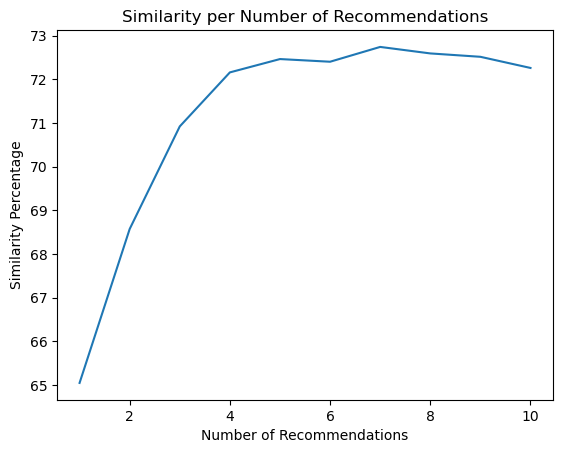

In [45]:
allsimi = []

for n_reco in range(1, 11):
    neigh = NearestNeighbors(n_neighbors=n_reco + 1, metric="cosine")
    neigh.fit(pca_array)
    error = 0
    for idxWine in range(len(wines)):
        wine_id = wines['WineID'].iloc[idxWine]
        
        # Get recommendations using your model
        model_recommendations = find_similar_wines(wine_id, wine_embeddings,  num_recommendations=n_reco)
        model_recommendations_indices = [wine_to_index[wine] for wine in model_recommendations]
        
        # Get recommendations using NearestNeighbors
        index = neigh.kneighbors([wineDatasetPCA.iloc[idxWine].drop("WineID")], return_distance=False)
        index = index[0].tolist()
        if idxWine in index:
            index.remove(idxWine)
        else:
            index = index[:-1]

        # Calculate error
        error += len(set(model_recommendations_indices + index)) - n_reco
    
    simiPerc = 100 - (error / (len(wines) * (n_reco * 2))) * 100
    allsimi.append(simiPerc)

n_of_reco = [x for x in range(1, 11)]
plt.plot(n_of_reco, allsimi)
plt.xlabel('Number of Recommendations')
plt.ylabel('Similarity Percentage')
plt.title("Similarity per Number of Recommendations")
plt.show()

Given that this was an experimental way of capturing information about wine and using it to make suggestions, we observe a **worse overlap of results** compared to previous methods. However, we still achieve a **high percentage of stable results** after 5 recommendations. This suggests there is an **underlying pattern** in these suggestions, confirming the effectiveness of our approach.
